In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.drop(columns=['Id'], errors='ignore', inplace=True)

In [6]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [8]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [9]:
df = pd.get_dummies(df,drop_first=True)

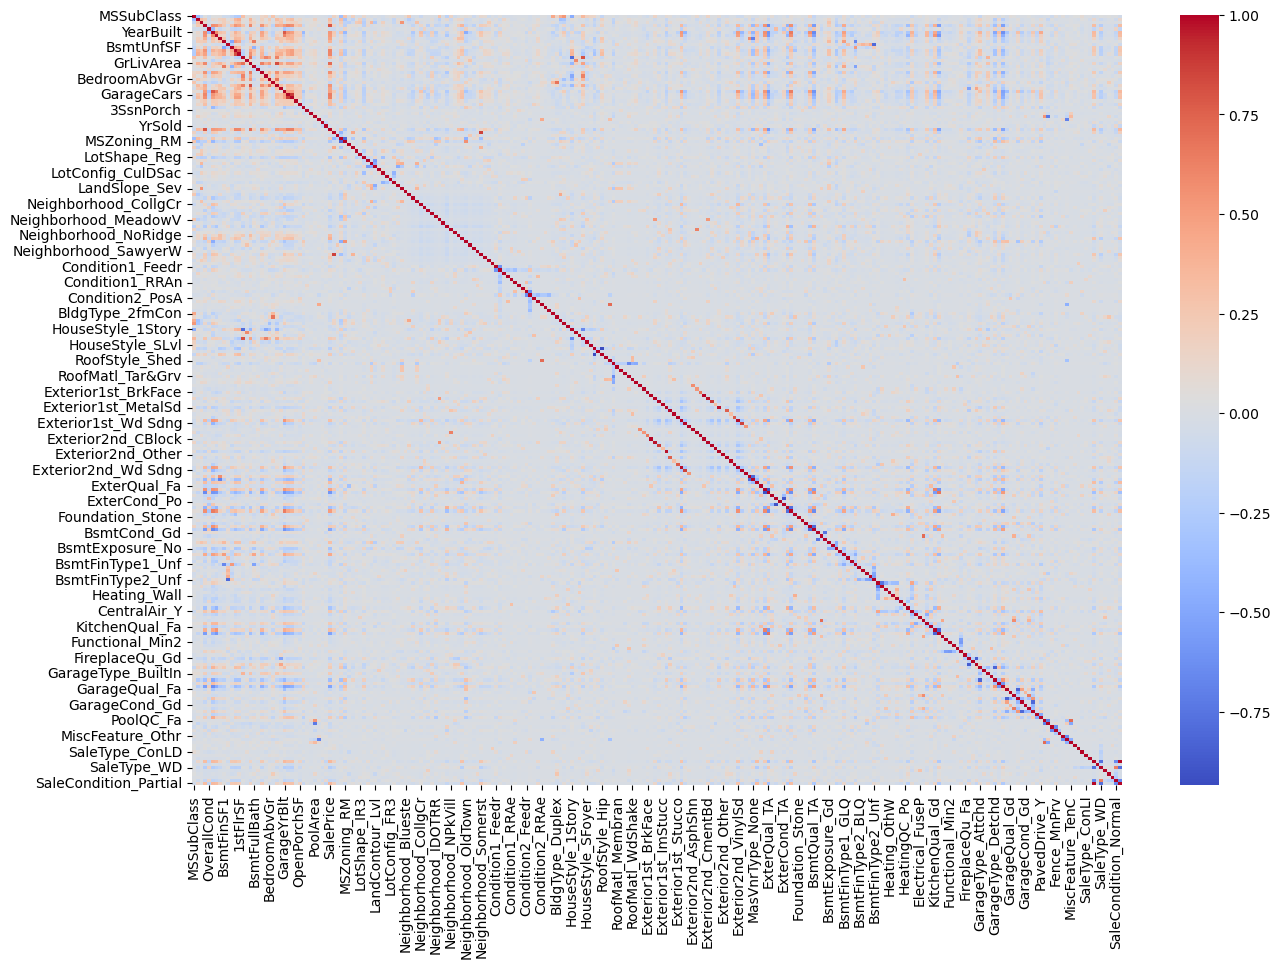

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.show()

In [11]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

<Axes: xlabel='SalePrice', ylabel='Count'>

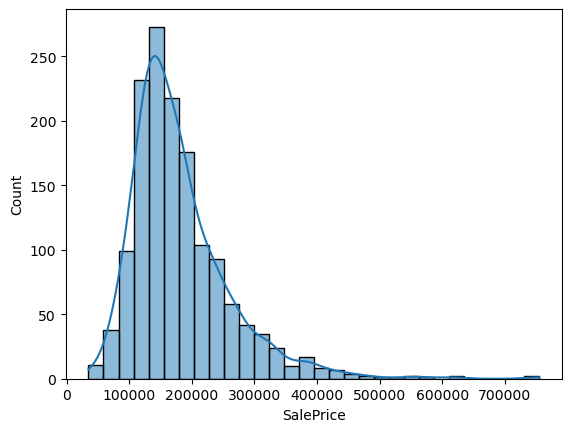

In [12]:
sns.histplot(y,kde=True, bins=30)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

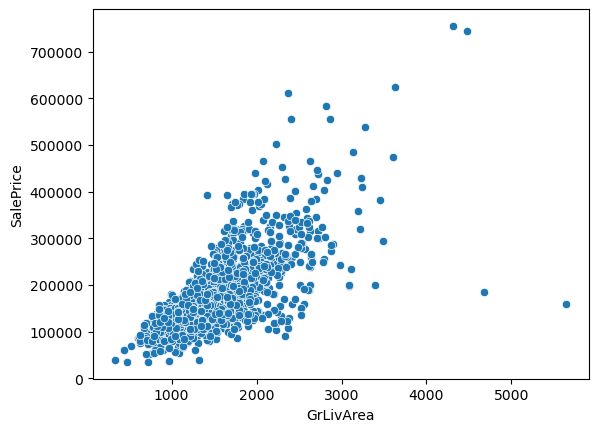

In [13]:
sns.scatterplot(x=df['GrLivArea'], y=y)

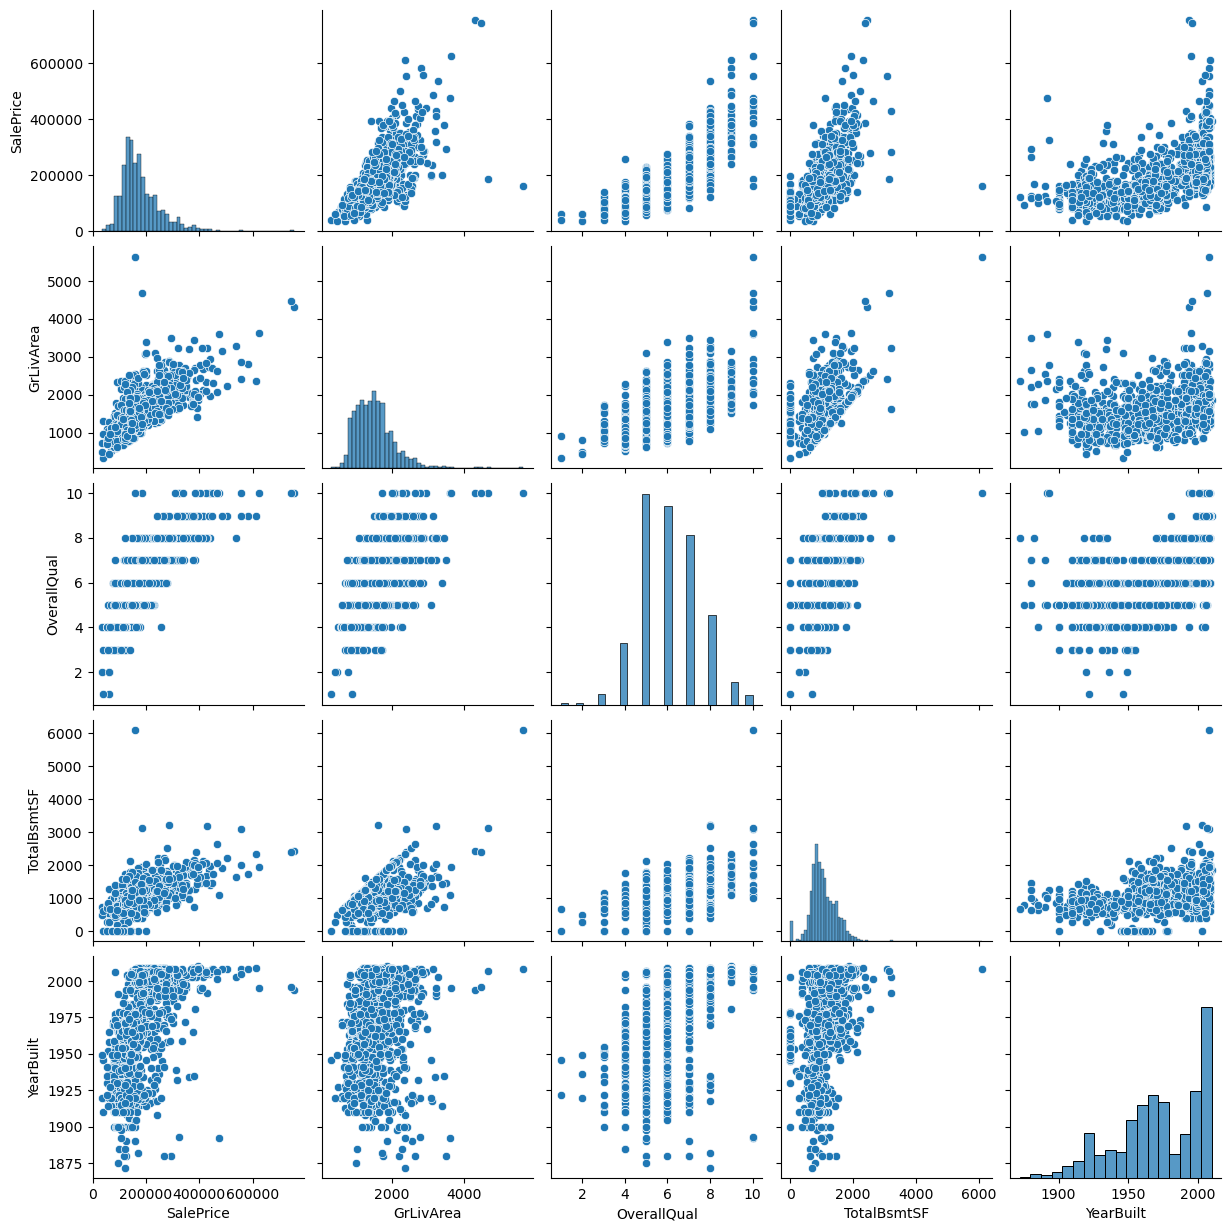

In [14]:
sns.pairplot(df[['SalePrice','GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']])
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scalers = {
    'StandardScaler':StandardScaler(),
    'MinMaxScaler':MinMaxScaler(),
    'RobustScaler':RobustScaler()
}

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}: Results:")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}")

StandardScaler: Results:
MAE: 6798639647.42, MSE: 13490452352029488578560.00, R2: -1758784696716.19
MinMaxScaler: Results:
MAE: 133064693390.05, MSE: 5168902319337883538817024.00, R2: -673882984858531.12
RobustScaler: Results:
MAE: 20314.88, MSE: 2631698751.38, R2: 0.66
